In [38]:
import pandas as pd
df = pd.read_csv('diabetes.csv')

In [39]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [40]:
df2 = df.drop('Pregnancies', axis=1)


In [41]:
df2

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [42]:
x = df2.iloc[:, :-1].values
y = df2.iloc[:, -1].values

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

In [44]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [46]:
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7186147186147186


In [47]:
clf2 = DecisionTreeClassifier(criterion = 'entropy',splitter='best',max_depth=5)
clf2 = clf2.fit(X_train,y_train)
y_pred2 = clf2.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred2))

Accuracy:  0.7619047619047619


In [48]:
clf3 = DecisionTreeClassifier(criterion = 'gini',splitter='best',max_depth=5)
clf3 = clf3.fit(X_train,y_train)
y_pred3 = clf3.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred3))

Accuracy:  0.7316017316017316


In [49]:
from flaml import AutoML
automl = AutoML()

settings = {
    "time_budget": 15,  # seconds
    "metric": 'accuracy', # metric used for the evaluation
    "task": 'classification', # type of the task
    "log_file_name": "./penguins.log", # location of the log
}

automl.fit(X_train=X_train, y_train=y_train,
           **settings)

[flaml.automl.automl: 02-24 00:59:40] {2716} INFO - task = classification
[flaml.automl.automl: 02-24 00:59:40] {2718} INFO - Data split method: stratified
[flaml.automl.automl: 02-24 00:59:40] {2721} INFO - Evaluation method: cv
[flaml.automl.automl: 02-24 00:59:40] {2848} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.automl: 02-24 00:59:40] {2994} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl.automl: 02-24 00:59:40] {3323} INFO - iteration 0, current learner lgbm
[flaml.automl.automl: 02-24 00:59:40] {3461} INFO - Estimated sufficient time budget=753s. Estimated necessary time budget=17s.
[flaml.automl.automl: 02-24 00:59:40] {3508} INFO -  at 0.1s,	estimator lgbm's best error=0.3351,	best estimator lgbm's best error=0.3351
[flaml.automl.automl: 02-24 00:59:40] {3323} INFO - iteration 1, current learner lgbm
[flaml.automl.automl: 02-24 00:59:40] {3508} INFO -  at 0.2s,	estimator lgbm's best error=0

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:40] {3323} INFO - iteration 5, current learner lgbm
[flaml.automl.automl: 02-24 00:59:40] {3508} INFO -  at 0.5s,	estimator lgbm's best error=0.2328,	best estimator lgbm's best error=0.2328
[flaml.automl.automl: 02-24 00:59:40] {3323} INFO - iteration 6, current learner lgbm
[flaml.automl.automl: 02-24 00:59:40] {3508} INFO -  at 0.6s,	estimator lgbm's best error=0.2328,	best estimator lgbm's best error=0.2328
[flaml.automl.automl: 02-24 00:59:40] {3323} INFO - iteration 7, current learner lgbm
[flaml.automl.automl: 02-24 00:59:40] {3508} INFO -  at 0.6s,	estimator lgbm's best error=0.2328,	best estimator lgbm's best error=0.2328
[flaml.automl.automl: 02-24 00:59:40] {3323} INFO - iteration 8, current learner lgbm
[flaml.automl.automl: 02-24 00:59:41] {3508} INFO -  at 0.7s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:41] {3323} INFO - iteration 9, current learner xgboost
[flaml.automl.a

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:41] {3323} INFO - iteration 11, current learner extra_tree
[flaml.automl.automl: 02-24 00:59:41] {3508} INFO -  at 1.0s,	estimator extra_tree's best error=0.2886,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:41] {3323} INFO - iteration 12, current learner rf
[flaml.automl.automl: 02-24 00:59:41] {3508} INFO -  at 1.1s,	estimator rf's best error=0.2514,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:41] {3323} INFO - iteration 13, current learner rf
[flaml.automl.automl: 02-24 00:59:41] {3508} INFO -  at 1.3s,	estimator rf's best error=0.2514,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:41] {3323} INFO - iteration 14, current learner rf
[flaml.automl.automl: 02-24 00:59:41] {3508} INFO -  at 1.4s,	estimator rf's best error=0.2514,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:41] {3323} INFO - iteration 15, current learner rf
[flaml.automl.a

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:43] {3323} INFO - iteration 35, current learner xgboost
[flaml.automl.automl: 02-24 00:59:43] {3508} INFO -  at 3.6s,	estimator xgboost's best error=0.2458,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:43] {3323} INFO - iteration 36, current learner extra_tree
[flaml.automl.automl: 02-24 00:59:44] {3508} INFO -  at 3.7s,	estimator extra_tree's best error=0.2515,	best estimator lgbm's best error=0.2290


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:44] {3323} INFO - iteration 37, current learner xgboost
[flaml.automl.automl: 02-24 00:59:44] {3508} INFO -  at 3.8s,	estimator xgboost's best error=0.2458,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:44] {3323} INFO - iteration 38, current learner extra_tree
[flaml.automl.automl: 02-24 00:59:44] {3508} INFO -  at 3.9s,	estimator extra_tree's best error=0.2515,	best estimator lgbm's best error=0.2290


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:44] {3323} INFO - iteration 39, current learner lgbm
[flaml.automl.automl: 02-24 00:59:44] {3508} INFO -  at 4.0s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:44] {3323} INFO - iteration 40, current learner xgboost
[flaml.automl.automl: 02-24 00:59:44] {3508} INFO -  at 4.1s,	estimator xgboost's best error=0.2458,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:44] {3323} INFO - iteration 41, current learner extra_tree


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:44] {3508} INFO -  at 4.2s,	estimator extra_tree's best error=0.2515,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:44] {3323} INFO - iteration 42, current learner lgbm
[flaml.automl.automl: 02-24 00:59:44] {3508} INFO -  at 4.3s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:44] {3323} INFO - iteration 43, current learner xgboost
[flaml.automl.automl: 02-24 00:59:44] {3508} INFO -  at 4.4s,	estimator xgboost's best error=0.2403,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:44] {3323} INFO - iteration 44, current learner extra_tree


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:44] {3508} INFO -  at 4.5s,	estimator extra_tree's best error=0.2515,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:44] {3323} INFO - iteration 45, current learner xgboost
[flaml.automl.automl: 02-24 00:59:45] {3508} INFO -  at 4.7s,	estimator xgboost's best error=0.2403,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:45] {3323} INFO - iteration 46, current learner lgbm


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:45] {3508} INFO -  at 4.8s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:45] {3323} INFO - iteration 47, current learner xgboost
[flaml.automl.automl: 02-24 00:59:45] {3508} INFO -  at 4.9s,	estimator xgboost's best error=0.2403,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:45] {3323} INFO - iteration 48, current learner lgbm


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:45] {3508} INFO -  at 5.0s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:45] {3323} INFO - iteration 49, current learner lgbm
[flaml.automl.automl: 02-24 00:59:45] {3508} INFO -  at 5.1s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:45] {3323} INFO - iteration 50, current learner extra_tree
[flaml.automl.automl: 02-24 00:59:45] {3508} INFO -  at 5.2s,	estimator extra_tree's best error=0.2515,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:45] {3323} INFO - iteration 51, current learner lgbm
[flaml.automl.automl: 02-24 00:59:45] {3508} INFO -  at 5.3s,	estimator lgbm's best error=0.2290,	best estimator lgbm's best error=0.2290
[flaml.automl.automl: 02-24 00:59:45] {3323} INFO - iteration 52, current learner lgbm
[flaml.automl.automl: 02-24 00:59:45] {3508} INFO -  at 5.3s,	estimator lgbm's best erro

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:46] {3508} INFO -  at 5.8s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:46] {3323} INFO - iteration 57, current learner lgbm
[flaml.automl.automl: 02-24 00:59:46] {3508} INFO -  at 5.9s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:46] {3323} INFO - iteration 58, current learner lgbm
[flaml.automl.automl: 02-24 00:59:46] {3508} INFO -  at 6.0s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:46] {3323} INFO - iteration 59, current learner lgbm
[flaml.automl.automl: 02-24 00:59:46] {3508} INFO -  at 6.1s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:46] {3323} INFO - iteration 60, current learner lgbm
[flaml.automl.automl: 02-24 00:59:46] {3508} INFO -  at 6.3s,	estimator lgbm's best error=0.2235,	be

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:47] {3508} INFO -  at 6.9s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:47] {3323} INFO - iteration 65, current learner lgbm
[flaml.automl.automl: 02-24 00:59:47] {3508} INFO -  at 6.9s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:47] {3323} INFO - iteration 66, current learner xgboost
[flaml.automl.automl: 02-24 00:59:47] {3508} INFO -  at 7.0s,	estimator xgboost's best error=0.2403,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:47] {3323} INFO - iteration 67, current learner lgbm


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:47] {3508} INFO -  at 7.2s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:47] {3323} INFO - iteration 68, current learner lgbm
[flaml.automl.automl: 02-24 00:59:47] {3508} INFO -  at 7.2s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:47] {3323} INFO - iteration 69, current learner lgbm
[flaml.automl.automl: 02-24 00:59:47] {3508} INFO -  at 7.4s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:47] {3323} INFO - iteration 70, current learner xgboost
[flaml.automl.automl: 02-24 00:59:47] {3508} INFO -  at 7.6s,	estimator xgboost's best error=0.2366,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:47] {3323} INFO - iteration 71, current learner lgbm


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:47] {3508} INFO -  at 7.7s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:47] {3323} INFO - iteration 72, current learner extra_tree
[flaml.automl.automl: 02-24 00:59:48] {3508} INFO -  at 7.8s,	estimator extra_tree's best error=0.2515,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:48] {3323} INFO - iteration 73, current learner lgbm
[flaml.automl.automl: 02-24 00:59:48] {3508} INFO -  at 7.9s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:48] {3323} INFO - iteration 74, current learner extra_tree
[flaml.automl.automl: 02-24 00:59:48] {3508} INFO -  at 8.0s,	estimator extra_tree's best error=0.2515,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:48] {3323} INFO - iteration 75, current learner lgbm
[flaml.automl.automl: 02-24 00:59:48] {3508} INFO -  at 8.2s,	estimator lgbm

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:48] {3323} INFO - iteration 79, current learner lgbm
[flaml.automl.automl: 02-24 00:59:48] {3508} INFO -  at 8.7s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:48] {3323} INFO - iteration 80, current learner extra_tree
[flaml.automl.automl: 02-24 00:59:49] {3508} INFO -  at 8.8s,	estimator extra_tree's best error=0.2515,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:49] {3323} INFO - iteration 81, current learner lgbm
[flaml.automl.automl: 02-24 00:59:49] {3508} INFO -  at 9.0s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:49] {3323} INFO - iteration 82, current learner xgboost


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:49] {3508} INFO -  at 9.3s,	estimator xgboost's best error=0.2366,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:49] {3323} INFO - iteration 83, current learner xgboost
[flaml.automl.automl: 02-24 00:59:49] {3508} INFO -  at 9.4s,	estimator xgboost's best error=0.2366,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:49] {3323} INFO - iteration 84, current learner extra_tree


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.automl: 02-24 00:59:49] {3508} INFO -  at 9.6s,	estimator extra_tree's best error=0.2515,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:49] {3323} INFO - iteration 85, current learner lgbm
[flaml.automl.automl: 02-24 00:59:49] {3508} INFO -  at 9.6s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:49] {3323} INFO - iteration 86, current learner xgboost


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:50] {3508} INFO -  at 9.9s,	estimator xgboost's best error=0.2366,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:50] {3323} INFO - iteration 87, current learner lgbm
[flaml.automl.automl: 02-24 00:59:50] {3508} INFO -  at 10.1s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:50] {3323} INFO - iteration 88, current learner lgbm
[flaml.automl.automl: 02-24 00:59:50] {3508} INFO -  at 10.2s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:50] {3323} INFO - iteration 89, current learner extra_tree
[flaml.automl.automl: 02-24 00:59:50] {3508} INFO -  at 10.2s,	estimator extra_tree's best error=0.2515,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:50] {3323} INFO - iteration 90, current learner lgbm
[flaml.automl.automl: 02-24 00:59:50] {3508} INFO -  at 10.5s,	estimator lgbm's be

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.automl: 02-24 00:59:51] {3508} INFO -  at 11.0s,	estimator xgboost's best error=0.2254,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:51] {3323} INFO - iteration 94, current learner xgboost


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.automl: 02-24 00:59:51] {3508} INFO -  at 11.1s,	estimator xgboost's best error=0.2254,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:51] {3323} INFO - iteration 95, current learner xgboost


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:51] {3508} INFO -  at 11.3s,	estimator xgboost's best error=0.2254,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:51] {3323} INFO - iteration 96, current learner xgboost


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:51] {3508} INFO -  at 11.5s,	estimator xgboost's best error=0.2254,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:51] {3323} INFO - iteration 97, current learner xgboost


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.automl: 02-24 00:59:52] {3508} INFO -  at 11.7s,	estimator xgboost's best error=0.2254,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:52] {3323} INFO - iteration 98, current learner xgboost


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.automl: 02-24 00:59:52] {3508} INFO -  at 11.8s,	estimator xgboost's best error=0.2254,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:52] {3323} INFO - iteration 99, current learner xgboost


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:52] {3508} INFO -  at 12.1s,	estimator xgboost's best error=0.2254,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:52] {3323} INFO - iteration 100, current learner extra_tree


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:52] {3508} INFO -  at 12.3s,	estimator extra_tree's best error=0.2440,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:52] {3323} INFO - iteration 101, current learner xgboost
[flaml.automl.automl: 02-24 00:59:52] {3508} INFO -  at 12.4s,	estimator xgboost's best error=0.2254,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:52] {3323} INFO - iteration 102, current learner lgbm


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:52] {3508} INFO -  at 12.6s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:52] {3323} INFO - iteration 103, current learner xgboost


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:53] {3508} INFO -  at 12.9s,	estimator xgboost's best error=0.2254,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:53] {3323} INFO - iteration 104, current learner xgboost


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:53] {3508} INFO -  at 13.1s,	estimator xgboost's best error=0.2254,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:53] {3323} INFO - iteration 105, current learner xgboost


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.automl: 02-24 00:59:53] {3508} INFO -  at 13.3s,	estimator xgboost's best error=0.2254,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:53] {3323} INFO - iteration 106, current learner extra_tree
[flaml.automl.automl: 02-24 00:59:53] {3508} INFO -  at 13.4s,	estimator extra_tree's best error=0.2440,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:53] {3323} INFO - iteration 107, current learner xgboost


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:53] {3508} INFO -  at 13.5s,	estimator xgboost's best error=0.2254,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:53] {3323} INFO - iteration 108, current learner extra_tree


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:54] {3508} INFO -  at 13.7s,	estimator extra_tree's best error=0.2421,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:54] {3323} INFO - iteration 109, current learner xgboost


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:54] {3508} INFO -  at 14.1s,	estimator xgboost's best error=0.2254,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:54] {3323} INFO - iteration 110, current learner lgbm


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


[flaml.automl.automl: 02-24 00:59:54] {3508} INFO -  at 14.1s,	estimator lgbm's best error=0.2235,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:54] {3323} INFO - iteration 111, current learner extra_tree
[flaml.automl.automl: 02-24 00:59:54] {3508} INFO -  at 14.3s,	estimator extra_tree's best error=0.2309,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:54] {3323} INFO - iteration 112, current learner extra_tree
[flaml.automl.automl: 02-24 00:59:54] {3508} INFO -  at 14.5s,	estimator extra_tree's best error=0.2309,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:54] {3323} INFO - iteration 113, current learner extra_tree
[flaml.automl.automl: 02-24 00:59:54] {3508} INFO -  at 14.6s,	estimator extra_tree's best error=0.2309,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:54] {3323} INFO - iteration 114, current learner xgboost
[flaml.automl.automl: 02-24 00:59:55] {3508} INFO -  

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.automl: 02-24 00:59:55] {3508} INFO -  at 15.0s,	estimator xgboost's best error=0.2254,	best estimator lgbm's best error=0.2235
[flaml.automl.automl: 02-24 00:59:55] {3323} INFO - iteration 116, current learner xgb_limitdepth
[flaml.automl.automl: 02-24 00:59:55] {3508} INFO -  at 15.0s,	estimator xgb_limitdepth's best error=0.2756,	best estimator lgbm's best error=0.2235


C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.p

[flaml.automl.automl: 02-24 00:59:55] {3772} INFO - retrain lgbm for 0.0s
[flaml.automl.automl: 02-24 00:59:55] {3779} INFO - retrained model: LGBMClassifier(colsample_bytree=0.8926975854402887,
               learning_rate=0.8979995759352434, max_bin=63,
               min_child_samples=11, n_estimators=6, num_leaves=6,
               reg_alpha=0.0023408937310692864, reg_lambda=12.755328229283197,
               verbose=-1)
[flaml.automl.automl: 02-24 00:59:55] {3024} INFO - fit succeeded
[flaml.automl.automl: 02-24 00:59:55] {3025} INFO - Time taken to find the best model: 5.554198265075684


In [50]:
'''retrieve best config and best learner'''
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best accuracy on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 6, 'num_leaves': 6, 'min_child_samples': 11, 'learning_rate': 0.8979995759352434, 'log_max_bin': 6, 'colsample_bytree': 0.8926975854402887, 'reg_alpha': 0.0023408937310692864, 'reg_lambda': 12.755328229283197}
Best accuracy on validation data: 0.7765
Training duration of best run: 0.01708 s


In [51]:
from flaml.ml import sklearn_metric_loss_score
test_accuracy = 1 - sklearn_metric_loss_score('accuracy', y_pred, y_test)
print(f'Accuracy on test data: {test_accuracy}')

Accuracy on test data: 0.7186147186147186


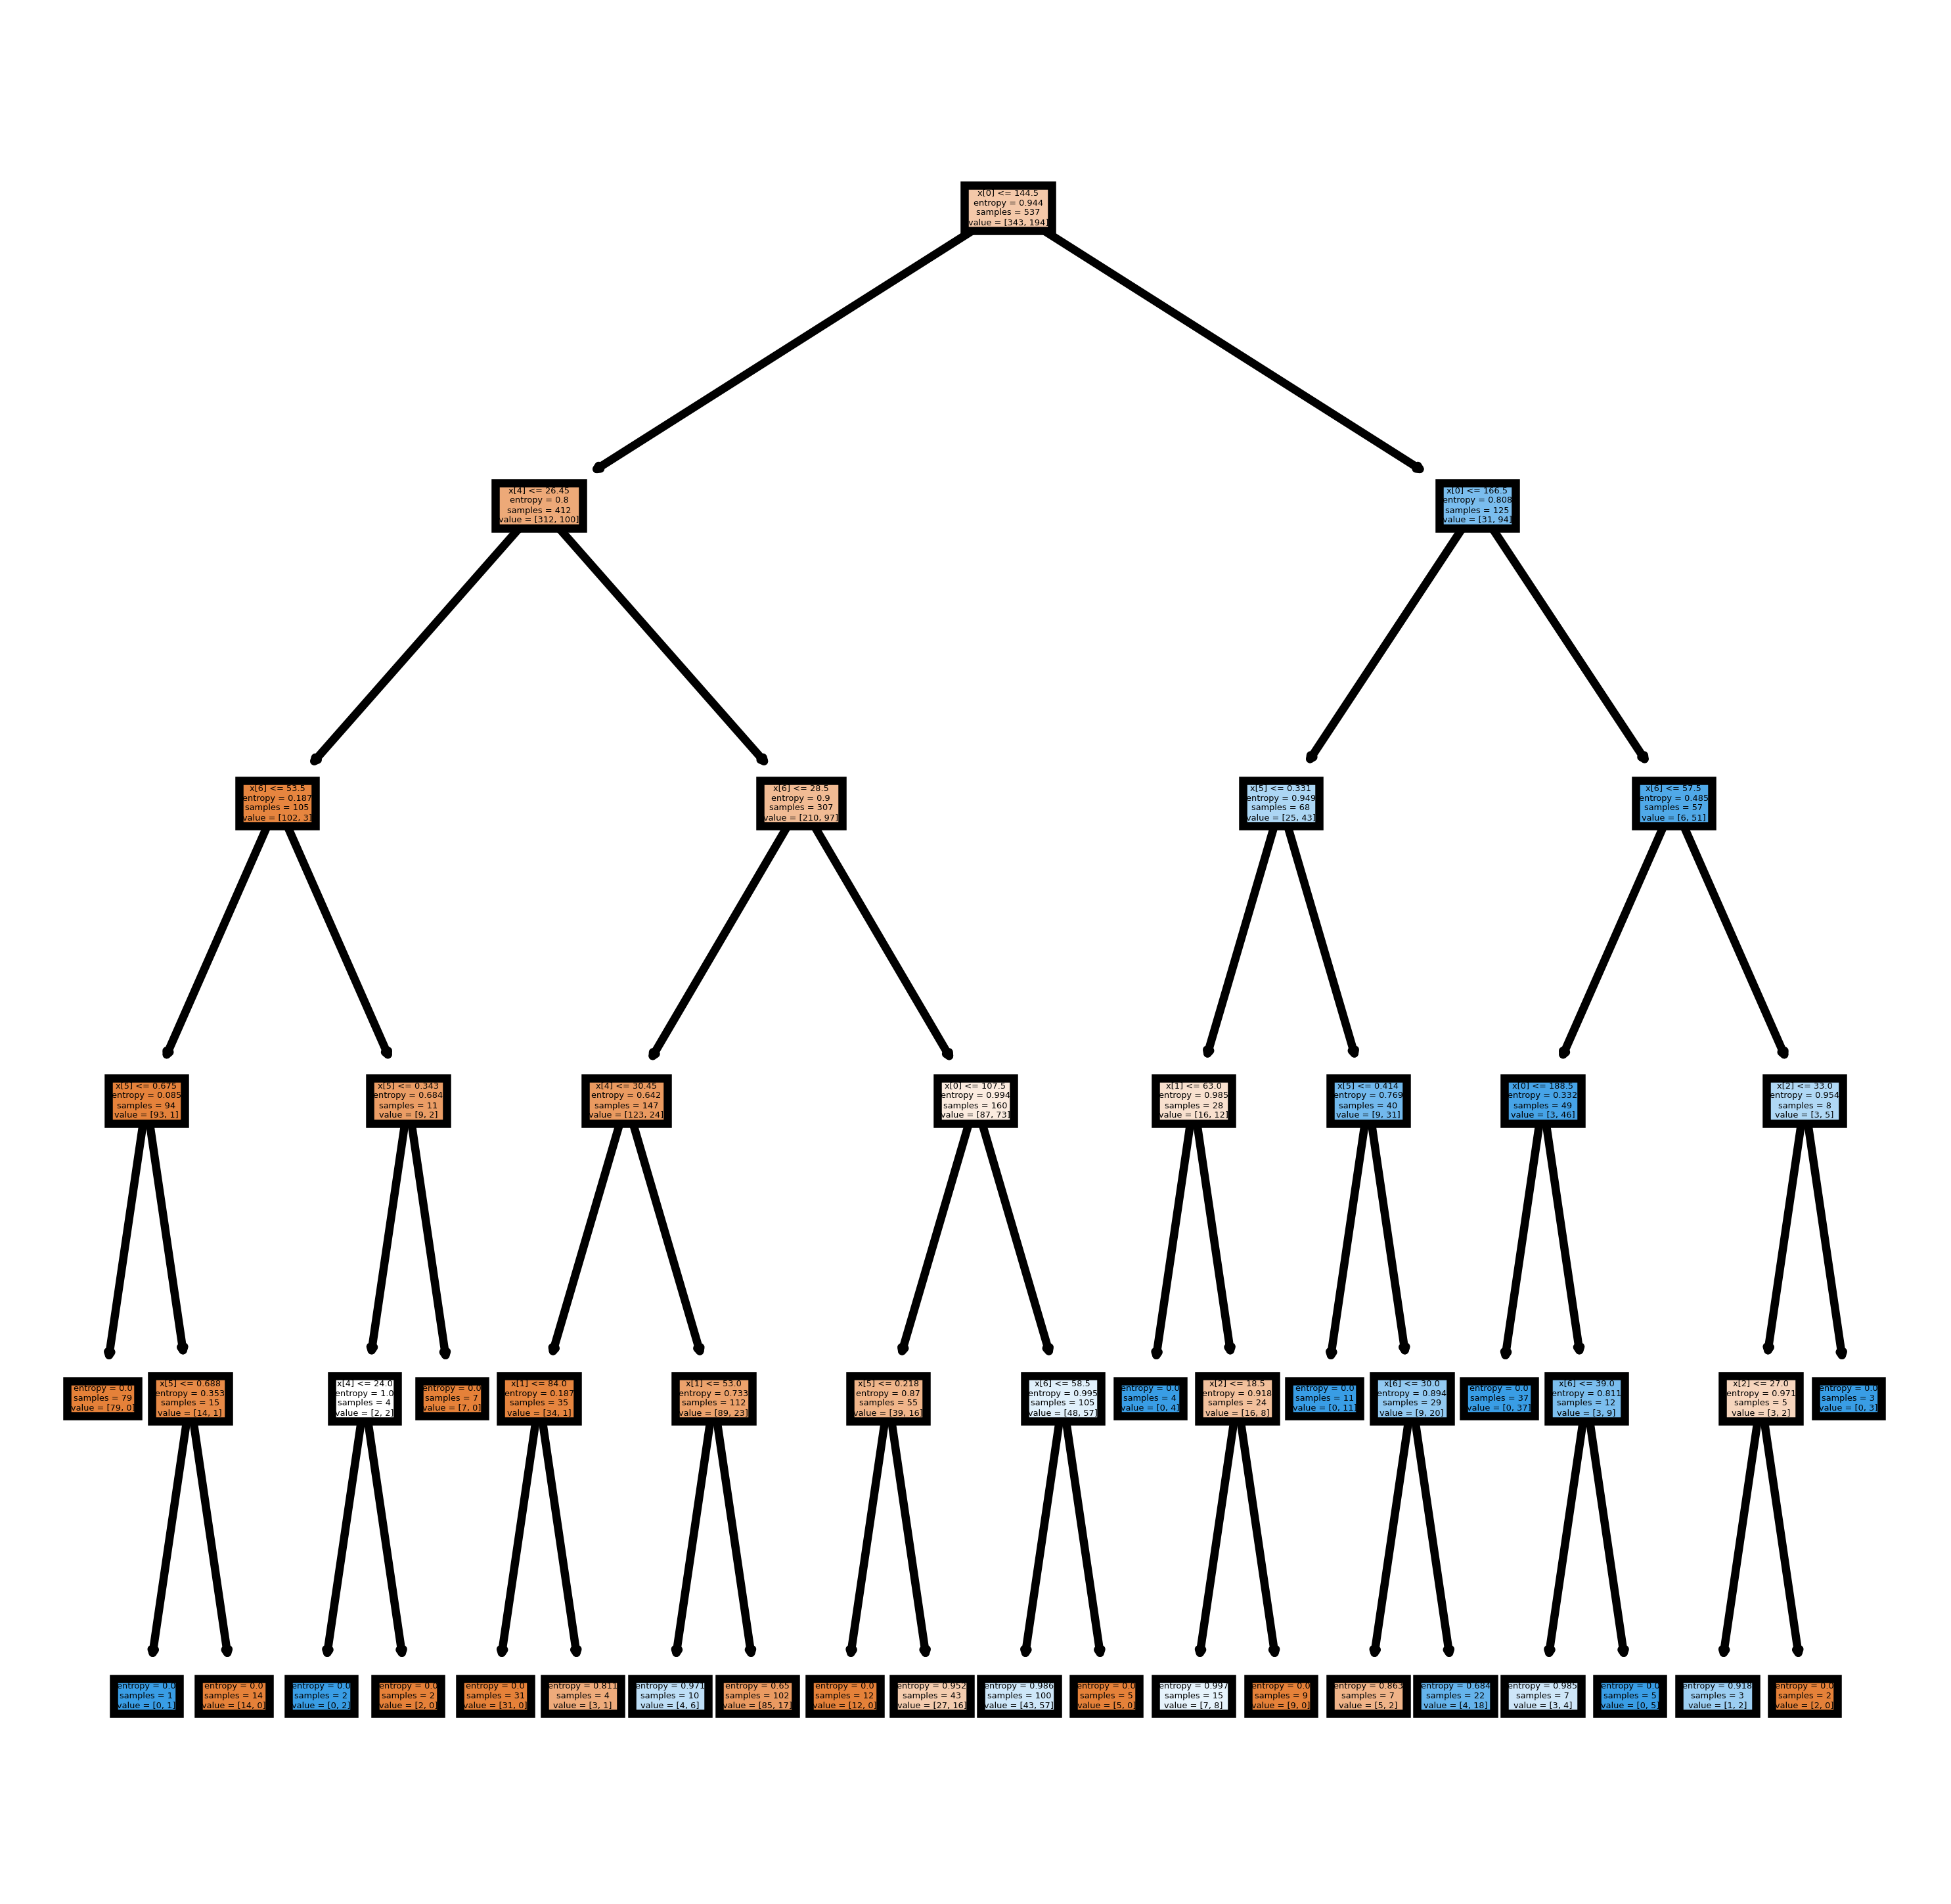

In [52]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=900)

from sklearn import tree
tree.plot_tree(clf2,
           filled = True);